<h2> Support Vector Regression</h2>

SVR is a type of Support Vector Machine ( that supports Linear and non-linear regression). Instead of one line of regression, the SVR tries to fit multiple linear lines into the data in order to reduce margins of error. As see in the image below, the goal is to keep the errors between the thresholds.

What steps are necessary to build a SVR:

- Collect training set T = {X,Y}
- Choose a kernel (e.g. gaussian) and its parameters and regularization (Noise)
- Form a Correlation matrix 
- Train machine to get contraction coefficients 
- use coefficients to create estimator

So the main difference between linear regression and SVR:

The linear regression goal ist to minimize the difference of observations and predictions. The SVR goal is to keep the predicitons within set thresholds.


<h3> Imports </h3>

As in the other regression notebook we want to check if the new employee demanding a salary of 160.000 $ for  job of level 6.5 is bluffing or if the salary is approritate for this postiton at his old company. By lokking at a short list of salarys in different postitions at the company we want to predict the salary he should have had a a job of level 6.5

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../sample_data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<h3> Feature Scaling </h3>

In [26]:
# Feature Scaling

# the svm class does not contain feature scaling, therefore we need to do it before creating the regressor
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


<h3> Create Regressor </h3>

In [27]:
from sklearn.svm import SVR

# the kernel defines if it will be a linear or non- linear Algorithm
# rbf represents the gaussian kernel, which is the most common non-linear kernel
regressor = SVR(kernel = 'rbf')

# Fitting the Regression Model to the dataset
regressor.fit(X,y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

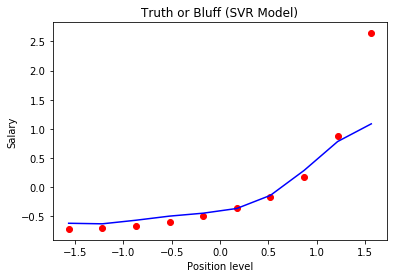

In [28]:

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [33]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

In [34]:
# re-scale predtiction to original format
y_pred = sc_y.inverse_transform(y_pred)

In [35]:
y_pred[0]

170370.02040650236

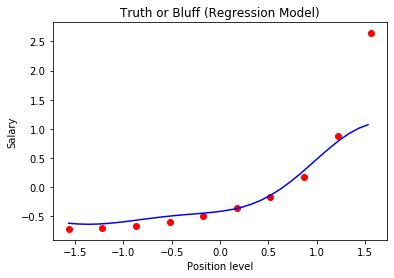

In [36]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()